In [40]:
#http://songhuiming.github.io/pages/2016/12/31/linear-regression-in-python-chapter-2/
#This exercise applies the above tutorial to diamonds dataset & identifies outliers in regression model

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
import itertools
from itertools import chain, combinations
import statsmodels.formula.api as smf
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats 
from statsmodels.graphics.regressionplots import *
import matplotlib.pyplot as plt
import copy
import math
import time
import plotly.plotly as py
import plotly.graph_objs as go

%matplotlib inline 

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('diamonds.csv',index_col=0)

In [3]:
df = df[1:1000] #reduce size of dataset to only 1000 records
df = df[['carat','cut','color','clarity','price']]

In [4]:
df.head()

,carat,cut,color,clarity,price
2,0.41,Ideal,J,VS2,637
3,0.60,Ideal,G,VVS2,2190
4,0.73,Ideal,D,VS2,3528
5,0.40,Ideal,E,VS2,912
6,0.73,Very Good,G,SI1,2330


In [5]:
df.describe()

,carat,price
count,999.000000,999.000000
mean,0.794474,3903.644645
std,0.478742,4039.994247
min,0.230000,326.000000
25%,0.400000,980.000000
50%,0.700000,2228.000000
75%,1.030000,5176.000000
max,2.630000,18692.000000


In [6]:
df[df.isnull().any(axis=1)].count()  #No null records

carat      0
cut        0
color      0
clarity    0
price      0
dtype: int64

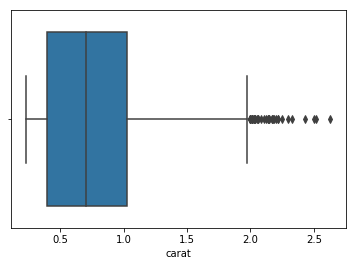

In [7]:
sns.boxplot(x=df["carat"])  #Explore the carat/size of diamonds

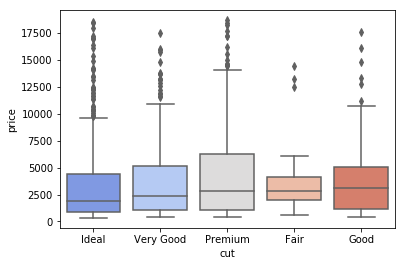

In [8]:
sns.boxplot(x="cut", y="price", data=df, palette="coolwarm")  #explore how...cuts of diamonds effect price

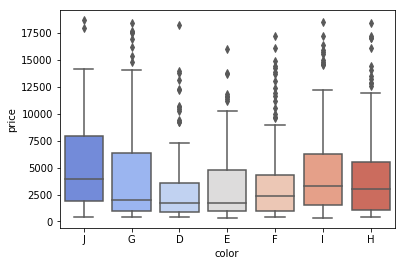

In [9]:
sns.boxplot(x="color", y="price", data=df, palette="coolwarm")  #...color of diamonds effect price

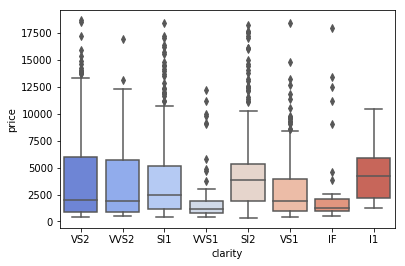

In [10]:
sns.boxplot(x="clarity", y="price", data=df, palette="coolwarm")  #...clarity of diamonds effect price

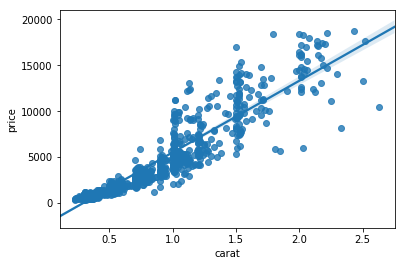

In [11]:
sns.regplot(x=df["carat"],y=df["price"],)  #relationship between carat & price

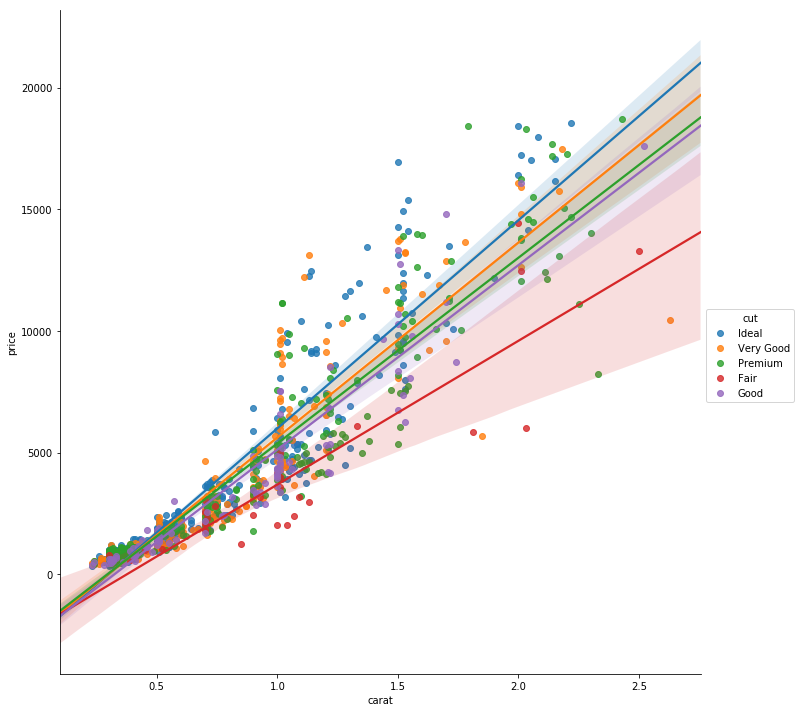

In [12]:
#https://seaborn.pydata.org/tutorial/regression.html
sns.lmplot(x="carat",y="price",hue="cut",
          truncate=False, size=10, data=df)

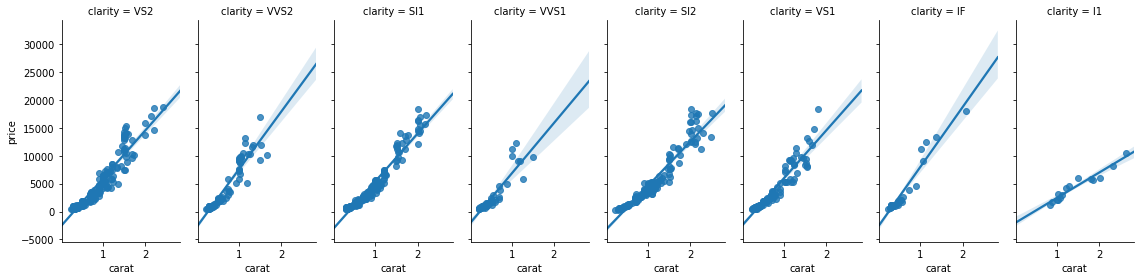

In [13]:
sns.lmplot(x="carat",y="price",col="clarity", data=df, aspect=.5,size=4)  #explore carat, price, and clarity

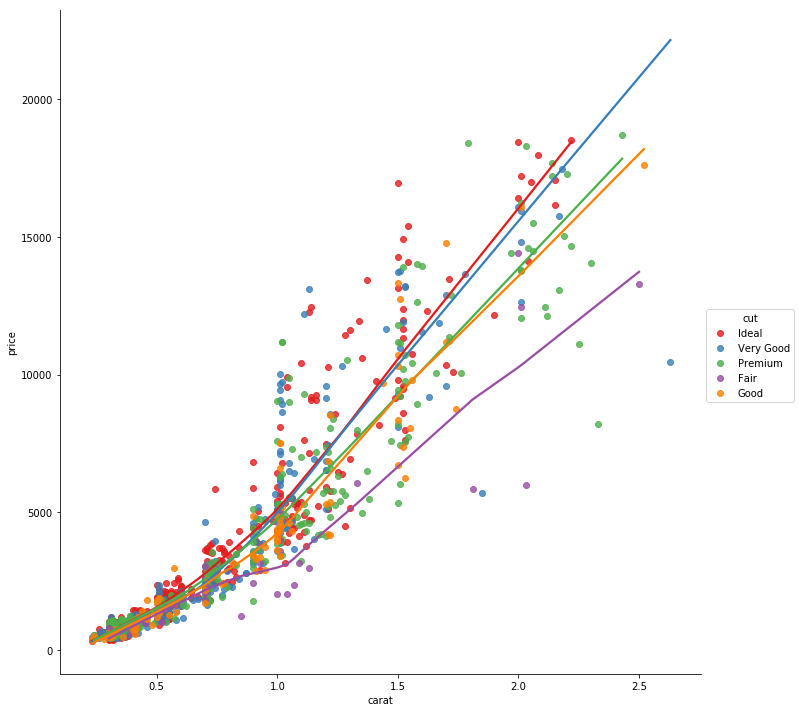

In [14]:
#explore carat, price, and cut

sns.lmplot(x="carat",y="price", lowess=True,hue="cut",
          truncate=False, size=10, palette="Set1",data=df)

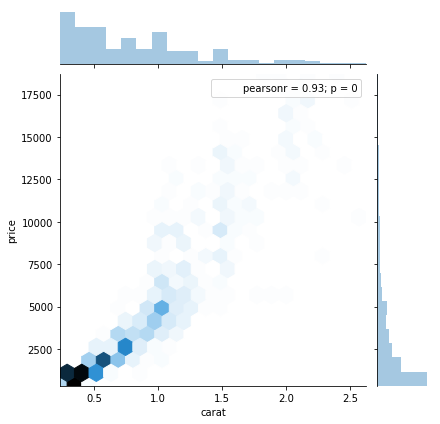

In [15]:
sns.jointplot(x='carat',y='price',data=df,kind='hex')  #view distributions of both price & carat

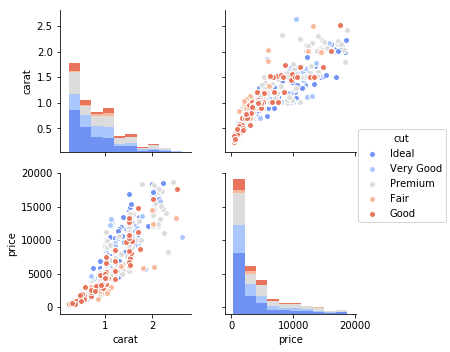

In [16]:
sns.pairplot(df,hue='cut',palette='coolwarm')

In [17]:
lm = smf.ols(formula = "price ~ cut + color + clarity + carat", data = df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     681.3
Date:                Fri, 17 Aug 2018   Prob (F-statistic):               0.00
Time:                        09:22:23   Log-Likelihood:                -8412.2
No. Observations:                 999   AIC:                         1.686e+04
Df Residuals:                     980   BIC:                         1.696e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -7753.4747    345.100  



Leverage v.s. Studentized Residuals


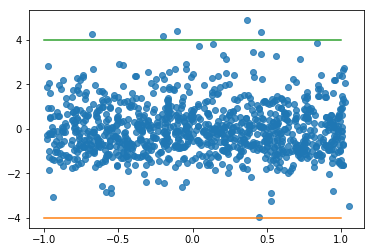

In [18]:
#Plot studentized/normalized residuals vs leverage of datapoint to identify outliers

influence = lm.get_influence()
resid_student = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag

print( '\n')
print( 'Leverage v.s. Studentized Residuals')
p = sns.regplot(x=leverage, y=resid_student, fit_reg=False, x_jitter=True, y_jitter=True)  

data = [(-1,-4),(1,-4)]
data2 = [(-1,4),(1,4)]

x_val = [x[0] for x in data]
y_val = [x[1] for x in data]

x_val2 = [x[0] for x in data2]
y_val2 = [x[1] for x in data2]

#print(x_val)
plt.plot(x_val,y_val)
plt.plot(x_val2,y_val2)
#plt.plot(x_val,y_val,'or')
plt.show()

In [19]:
df_res = pd.concat([pd.Series(cooks, name = "cooks"), pd.Series(dffits, name = "dffits"), pd.Series(leverage, name = "leverage"), pd.Series(resid_student, name = "resid_student")], axis = 1)
df_res = pd.concat([df, df_res], axis = 1)
df_res.describe()

,carat,price,cooks,dffits,leverage,resid_student
count,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.000000
mean,0.794474,3903.644645,1.360448e-03,0.002921,0.019019,0.000777
std,0.478742,4039.994247,4.860647e-03,0.161316,0.011291,1.005821
min,0.230000,326.000000,2.610434e-10,-1.264741,0.010486,-4.168344
25%,0.400000,980.000000,6.647495e-05,-0.079647,0.013032,-0.621838
50%,0.700000,2228.000000,2.892478e-04,-0.020992,0.015439,-0.156607
75%,1.030000,5176.000000,8.327348e-04,0.056601,0.020845,0.454588
max,2.630000,18692.000000,8.280432e-02,0.711224,0.098090,4.802559


In [20]:
df_res = df_res.sort_values(by=['resid_student','leverage'], ascending=[1,0])
df_res2 = df_res[['carat', 'cut', 'color', 'clarity', 'price', 'leverage', 'resid_student','cooks']]
print(df_res2[abs(df_res2.resid_student) > 4])

     carat        cut color clarity   price  leverage  resid_student     cooks
184   0.84  Very Good     G     SI2  2584.0  0.084300      -4.168344  0.082804
975   1.03  Very Good     D     SI2  4478.0  0.022085       4.104123  0.019703
634   0.50      Ideal     D     VS1  1893.0  0.019595       4.646196  0.022241
728   0.38      Ideal     G     SI1   639.0  0.018313       4.802559  0.022146


In [21]:
#Negative resid_student & cooks correspond with undervalued predictions in .R model using regression trees
#NOTE: this model does not take into account all records in the dataset

In [22]:
df.head()

,carat,cut,color,clarity,price
2,0.41,Ideal,J,VS2,637
3,0.60,Ideal,G,VVS2,2190
4,0.73,Ideal,D,VS2,3528
5,0.40,Ideal,E,VS2,912
6,0.73,Very Good,G,SI1,2330


In [23]:
group = df.groupby(['cut','color'])['price'].median()
group = pd.DataFrame(group)

In [24]:
group

price
cut       color        
Fair      D      2550.0
          E       899.0
          F      3170.0
          G      2773.5
          H      4166.0
          I      2035.0
          J      2438.0
Good      D      3179.0
          E      4261.0
          F      1447.0
          G      4520.0
          H      2943.5
          I      2905.0
          J      6363.0
Ideal     D      1129.0
          E      1579.0
          F      2039.0
          G      1913.5
          H      1944.0
          I      2392.5
          J      3931.0
Premium   D      1937.5
          E      1746.0
          F      2391.0
          G      2098.5
          H      3804.0
          I      4420.0
          J      5308.0
Very Good D      1408.0
          E      1726.0
          F      3075.0
          G      1724.0
          H      3002.0
          I      4361.0
          J      2250.5

In [25]:
df['carat'].max() #max carat

2.63

In [26]:
#https://stackoverflow.com/questions/18265935/python-create-list-with-numbers-between-2-values
#use pd.cut function can attribute the values into its specific bins

bin = np.arange(0,3,.25) #bins for carat
print(bin)

category = pd.cut(df.carat,bin)
category = category.to_frame()
category.columns = ['range']
#concatenate age and its bin
df_new = pd.concat([df,category],axis = 1)

[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75]


In [27]:
df_new.head()

,carat,cut,color,clarity,price,range
2,0.41,Ideal,J,VS2,637,"(0.25, 0.5]"
3,0.60,Ideal,G,VVS2,2190,"(0.5, 0.75]"
4,0.73,Ideal,D,VS2,3528,"(0.5, 0.75]"
5,0.40,Ideal,E,VS2,912,"(0.25, 0.5]"
6,0.73,Very Good,G,SI1,2330,"(0.5, 0.75]"


In [28]:
group_carat = df_new.groupby(['range'])['price'].median()

In [29]:
group_carat

range
(0.0, 0.25]      442.0
(0.25, 0.5]      816.0
(0.5, 0.75]     1966.0
(0.75, 1.0]     3625.0
(1.0, 1.25]     5341.0
(1.25, 1.5]     9306.0
(1.5, 1.75]    10950.0
(1.75, 2.0]    14410.0
(2.0, 2.25]    15274.5
(2.25, 2.5]    13660.0
(2.5, 2.75]    14022.5
Name: price, dtype: float64

In [30]:
group_all = df_new.groupby(['range','cut','color','clarity'])['price'].median().to_frame() #hierarchical index

In [31]:
group_all = df_new.groupby(['range','cut','color','clarity'])['price'].median().reset_index() #https://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-object-to-dataframe

In [39]:
group_all.head(25)

,range,cut,color,clarity,price
0,"(0.0, 0.25]",Good,F,IF,492.0
1,"(0.0, 0.25]",Good,G,VVS1,395.0
2,"(0.0, 0.25]",Ideal,E,SI2,326.0
3,"(0.0, 0.25]",Ideal,G,VS1,442.0
4,"(0.0, 0.25]",Premium,E,VVS1,553.0
5,"(0.0, 0.25]",Premium,H,VVS1,432.0
6,"(0.0, 0.25]",Very Good,D,VVS2,485.0
7,"(0.0, 0.25]",Very Good,E,VS1,419.0
8,"(0.0, 0.25]",Very Good,E,VVS1,552.0
9,"(0.0, 0.25]",Very Good,F,VVS2,468.0


In [33]:
cut = 'Good'
color = 'F'
carat = '(0.25, 0.5]'
clarity = 'VS1'

#criteria_all = cut & color & carat & clarity

df_final = group_all[(group_all['cut']=='Good') & 
                     (group_all['color']=='F') &
                    (group_all['clarity']=='VS1')]

In [34]:
df_final.head()

,range,cut,color,clarity,price
22,"(0.25, 0.5]",Good,F,VS1,1109.0
147,"(0.5, 0.75]",Good,F,VS1,1712.0


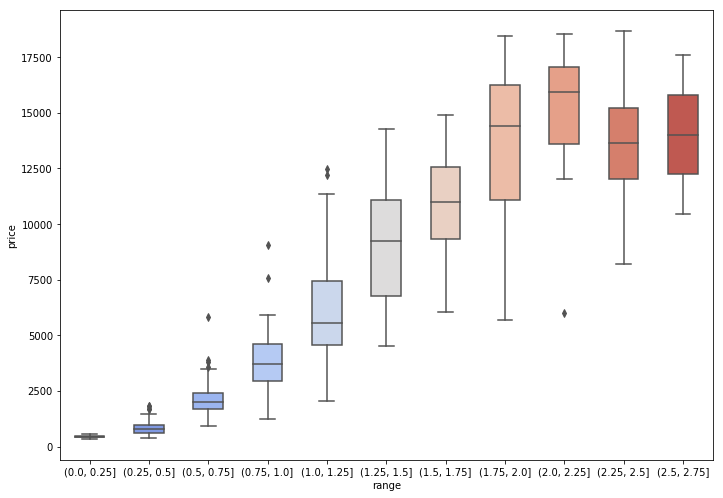

In [38]:
#https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.boxplot(ax=ax,x="range", y="price", data=group_all, palette="coolwarm",width=.5)